In [3]:
from geo_model2 import GeoModel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Neighbourhood Influence only

In [127]:
# simulate
seed = 187758
parameters = {"cost_clean": .4, "cost_dirty":.2, "base_output_dirty":0.4, "base_output_clean":0.2,
                 "metabolism_scalar_energy":1, "metabolism_scalar_money":1, "eta_global_trade":0.01,
                 "predisposition_decrease":0.000_05, "pareto_optimal":False, "seed":seed, "prob_neigh_influence" : 0}
x_probs = np.linspace(0,1,num=10)
n_simulations = 2
shape = (len(x_probs),n_simulations)

welfares_test = np.empty(shape)
print(welfares_test.shape)
gini_vals = np.empty(shape)
modularity_vals = np.empty(shape)
for idx1 in range(n_simulations):
    for idx2, x in enumerate(x_probs):
        args = parameters.copy()
        args["prob_neigh_influence"] = x

        cur_model = GeoModel(**args) # 1000 runs
        cur_model.run_model(200)
        data = cur_model.datacollector.get_model_vars_dataframe().iloc[-1]
        welfares_test[idx2, idx1] = data.Welfare
        modularity_vals[idx2, idx1] = data.modularity_ga
        gini_vals[idx2, idx1] = data.Gini_welfare

    print("sim", idx1+2)

(10, 2)


/Users/paulhosek/PycharmProjects/Agent_based_modeling/country2.py:212: RuntimeWarning: divide by zero encountered in divide
  self.mrs = np.divide(np.multiply(np.add(self.w_energy, self.produced_energy), self.m_money),
/Users/paulhosek/PycharmProjects/Agent_based_modeling/country2.py:175: RuntimeWarning: invalid value encountered in power
  return np.power(self.w_energy + self.produced_energy + add_energy, self.m_energy / mt) \
/Users/paulhosek/PycharmProjects/Agent_based_modeling/country2.py:212: RuntimeWarning: divide by zero encountered in divide
  self.mrs = np.divide(np.multiply(np.add(self.w_energy, self.produced_energy), self.m_money),
/Users/paulhosek/opt/anaconda3/envs/Agent_based_modeling/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 1, 3, 17.
  warnings.warn(message)
/Users/paulhosek/opt/anaconda3/envs/Agent_based_modeling/lib/python3.

sim 1


/Users/paulhosek/PycharmProjects/Agent_based_modeling/country2.py:212: RuntimeWarning: divide by zero encountered in divide
  self.mrs = np.divide(np.multiply(np.add(self.w_energy, self.produced_energy), self.m_money),
/Users/paulhosek/PycharmProjects/Agent_based_modeling/country2.py:175: RuntimeWarning: invalid value encountered in power
  return np.power(self.w_energy + self.produced_energy + add_energy, self.m_energy / mt) \
/Users/paulhosek/PycharmProjects/Agent_based_modeling/country2.py:212: RuntimeWarning: divide by zero encountered in divide
  self.mrs = np.divide(np.multiply(np.add(self.w_energy, self.produced_energy), self.m_money),
/Users/paulhosek/opt/anaconda3/envs/Agent_based_modeling/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 1, 3, 17.
  warnings.warn(message)
/Users/paulhosek/opt/anaconda3/envs/Agent_based_modeling/lib/python3.

sim 2


In [132]:
def raw_to_ci_mean(data, confidence_level = 1.96):
    """Convert 2d np array to ci and mean."""
    mean = np.mean(data, axis=1)
    sem = np.std(data, axis=1) / np.sqrt(data.shape[1])
    low = mean - confidence_level*sem
    high = mean + confidence_level*sem
    return mean, low, high

def draw_line_ci(cur_mean,low,high, x_vals = None, label = 'None', color='blue'):
    if not x_vals:
        x_vals = range(len(cur_mean))



In [136]:
print(modularity_vals)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0.01197716 0.01187503 0.01191228 0.01193543 0.01196271 0.01194008
 0.01193505 0.01190651 0.01197069 0.01196619]


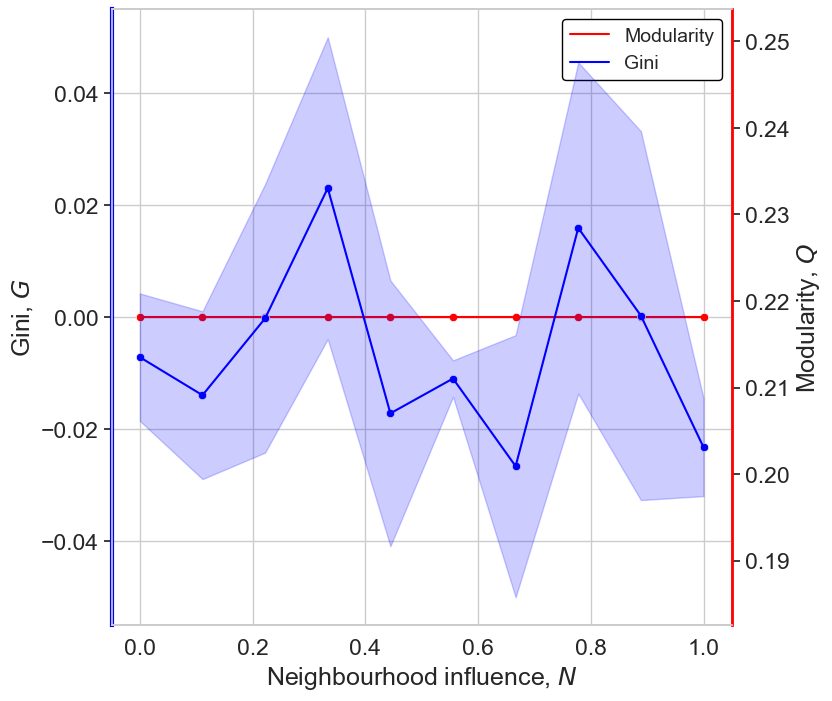

In [135]:
w_mean, w_low, w_high = raw_to_ci_mean(welfares_test)
m_mean, m_low, m_high = raw_to_ci_mean(modularity_vals)
g_mean, g_low, g_high = raw_to_ci_mean(gini_vals)
x_vals = x_probs
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(8,8))

print(x_vals, w_low)
ax1 = sns.lineplot(x= x_vals,y = m_mean, label='Modularity',color= 'Red')

sns.scatterplot(x= x_vals,y = m_mean, color= 'Red', ax=ax1)
ax1.fill_between(x_vals,m_low, m_high, alpha=0.2, color='Red')
ax2 = ax1.twinx()
sns.lineplot(x= x_vals,y = g_mean, label="Gini",color= 'blue', ax=ax2)
sns.scatterplot(x= x_vals,y = g_mean, color= 'blue', ax=ax2)
ax2.fill_between(x_vals,g_low, g_high, alpha=0.2, color='blue')


ax2.legend([],[],frameon=False)
ax2.grid(None)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines + lines2, labels + labels2, loc='upper right', framealpha=1, prop={'size': 14})
leg.get_frame().set_edgecolor('black')
ax2.spines['right'].set_color('red')
ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(2)
ax2.set_ylabel(r"Modularity, $Q$")
ax1.set_ylabel(r"Gini, $G$")
ax1.set_xlabel(r"Neighbourhood influence, $N$")

plt.show()

In [107]:
# def plot_convergence(fname,pic_name=None, first_n_iters=None, plot_points = True,
#                      plot_raw_data=False, plot_final_state = True,plot_std=False,folder='logged_data'):
#     """
#     Plot convergence for single run, temperature and final configuration in single plot and save as svg.
#     @param fname: file name for the energies
#     @param pic_name: the name of the output image, if black will use "final_particles_" + fname + '.csv'
#     @param first_n_iters: only show the first n evaluations
#     @param plot_points: if plot the mean energy as additional scatterpoints over the curve
#     @param plot_raw_data: if plot the raw data under the plot
#     """
#
#
#     # plotting.plot_points(my_charge.particles)
#     # ins.plotting.plot_points(my_charge.particles
#
#
#     # calculate mean and 95% ci for temperature level
#     stats = res_df.groupby(['Temperatures']).agg(['mean','std','sem'])
#     # print(stats['mean'])
#     x_iters = stats["Iterations"]['mean']
#     stats = stats["Potential_energy"]
#     stats['ci95_hi'] = stats['mean'] + 1.96 * stats['sem']
#     stats['ci95_lo'] = stats['mean'] - 1.96 * stats['sem']
#     stats['std_hi'] = stats['mean'] + stats['std']
#     stats['std_lo'] = stats['mean'] - stats['std']
#     stats = stats.iloc[::-1]
#
#     # draw
#     fax1 = plt.figure(figsize=(12*0.9, 8*0.9))
#     sns.set_theme(style="whitegrid")
#     sns.set_context("notebook", font_scale=1.5)
#
#     # draw main convergence data, CI and means
#     ax1 = sns.lineplot(x=x_iters, y=stats['mean'], sort=False, color='blue', label='Mean Energy')
#     # plot raw data
#     if plot_raw_data:
#         sns.lineplot(ax=ax1, x=res_df["Iterations"], y=res_df["Potential_energy"],
#                      color='black',alpha=0.15,label='Raw energy')
#     sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_hi'], sort=False, color='cornflowerblue', linestyle='--', label='95% CI')
#     sns.lineplot(ax=ax1, x=x_iters, y=stats['ci95_lo'], sort=False, color='cornflowerblue', linestyle='--')
#     if plot_std:
#         sns.lineplot(ax=ax1, x=x_iters, y=stats['std_hi'], sort=False, color='white',alpha=0, linestyle='--')
#         sns.lineplot(ax=ax1, x=x_iters, y=stats['std_lo'], sort=False, color='white',alpha=0, linestyle='--')
#         ax1.fill_between(x_iters[::-1], stats['mean'], stats['std_hi'], color='black', alpha=0.15)
#         ax1.fill_between(x_iters[::-1], stats['mean'], stats['std_lo'], color='black', alpha=0.15,label='±Standard deviation')
#
#     ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_hi'], color='cornflowerblue', alpha=0.5)
#     ax1.fill_between(x_iters[::-1], stats['mean'], stats['ci95_lo'], color='cornflowerblue', alpha=0.5)
#     if plot_points:
#         ax1.scatter(x_iters[::-1], stats['mean'], color='black', s=20)
#
#     # add temperature plot
#     sns.set_theme(style="white")
#     ax2 = ax1.twinx()
#     temp_line = sns.lineplot(ax=ax2, x=res_df["Iterations"], y=res_df["Temperatures"], color='red', label='Temperature')
#
#     # insert final configuration
#     if plot_final_state:
#         ins = ax1.inset_axes([0.65,0.46,0.3,0.3*1.5])
#         insert_plot(final_config,ax=ins)
#
#
#
#     # legend
#     ax2.legend([],[],frameon=False)
#     lines, labels = ax1.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     leg = ax1.legend(lines + lines2, labels + labels2, loc='upper center', framealpha=1, prop={'size': 14})
#     leg.get_frame().set_edgecolor('black')
#
#     # color the axis
#     ax2.spines['right'].set_color('red')
#     ax1.spines['left'].set_color('blue')
#     ax2.spines['right'].set_linewidth(2)
#     ax1.spines['left'].set_linewidth(2)
#
#
#     ax1.set_ylabel(r"Potential Energy, $E$")
#     ax1.set_xlabel("Evaluations")
#     temp_line.set_ylabel("Temperature", fontsize = 18)
#     if first_n_iters:
#         plt.xlim((1, first_n_iters))
#     plt.savefig('Images/'+pic_name+".svg",dpi=300,bbox_inches='tight')